# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

def valores_nas_barras(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

base = pd.read_csv('SINASC_RO_2019.csv')


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

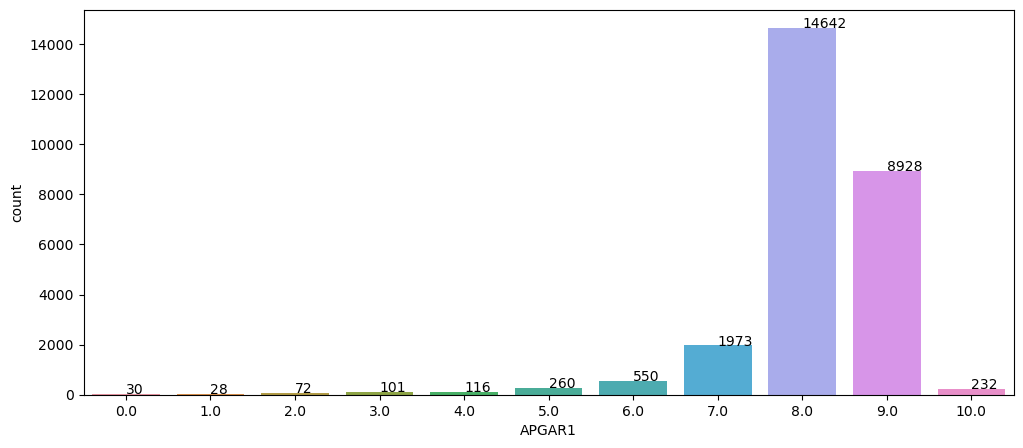

In [2]:
plt.figure(figsize=(12,5))
sns.countplot(x='APGAR1', data=base)
valores_nas_barras(base['APGAR1'].value_counts().index , base['APGAR1'].value_counts())

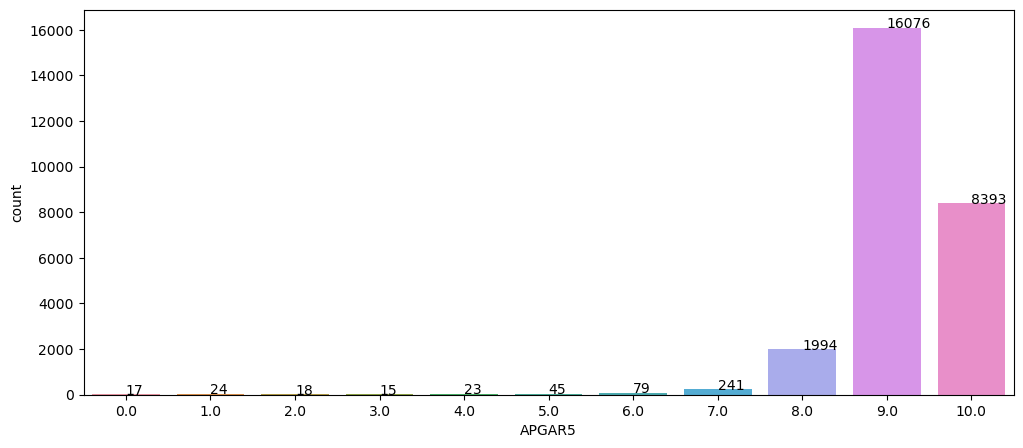

In [3]:
plt.figure(figsize=(12,5))
sns.countplot(x='APGAR5', data=base)
valores_nas_barras(base['APGAR5'].value_counts().index , base['APGAR5'].value_counts())

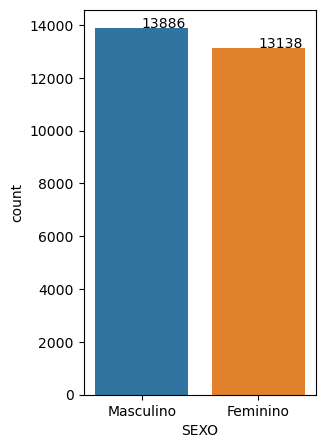

In [4]:
plt.figure(figsize=(3,5))
sns.countplot(x='SEXO', data=base)
valores_nas_barras(base['SEXO'].value_counts().index , base['SEXO'].value_counts())

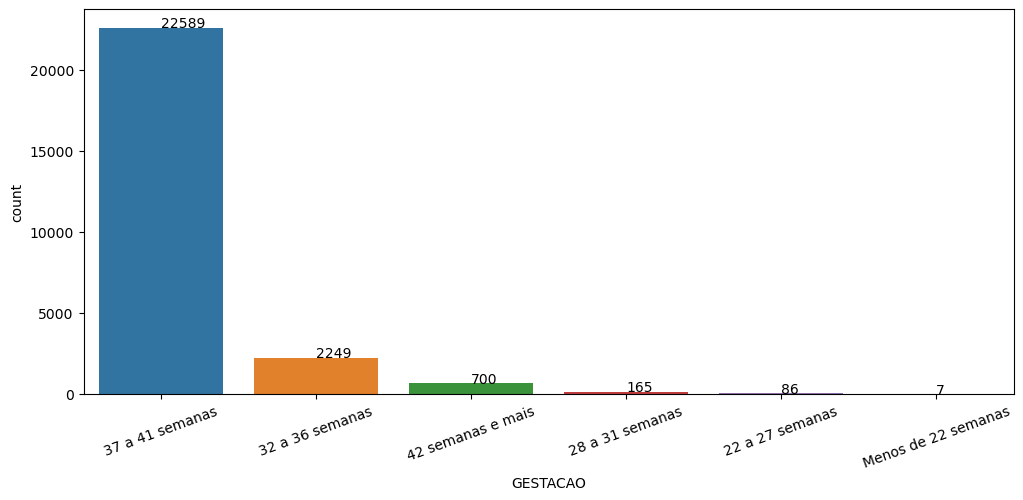

In [5]:
plt.figure(figsize=(12,5))
sns.countplot(x='GESTACAO', data=base, order=base['GESTACAO'].value_counts().index).tick_params(axis="x", rotation = 20)
valores_nas_barras(base['GESTACAO'].value_counts().index , base['GESTACAO'].value_counts())

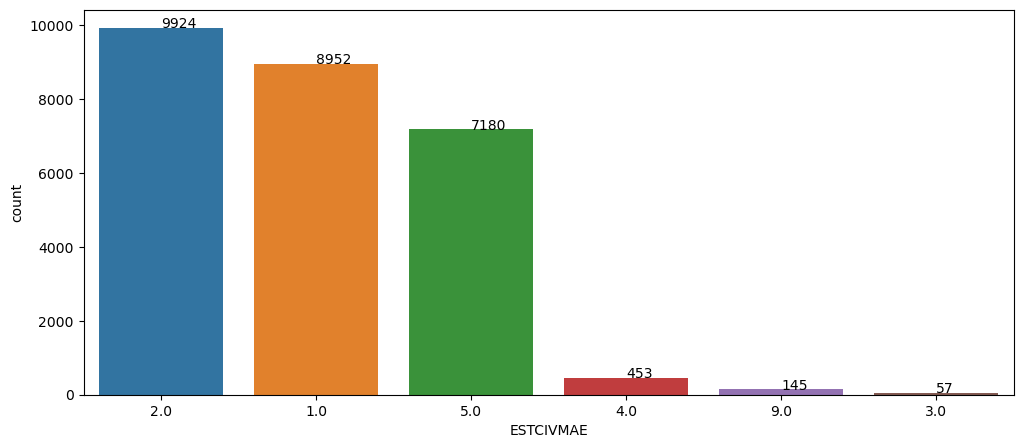

In [6]:
plt.figure(figsize=(12,5))
sns.countplot(x='ESTCIVMAE', data=base, order=base['ESTCIVMAE'].value_counts().index)
valores_nas_barras(list(base['ESTCIVMAE'].value_counts().index) , list(base['ESTCIVMAE'].value_counts()))

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

C:\Users\karin\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


<Axes: xlabel='CONSULTAS', ylabel='APGAR5'>

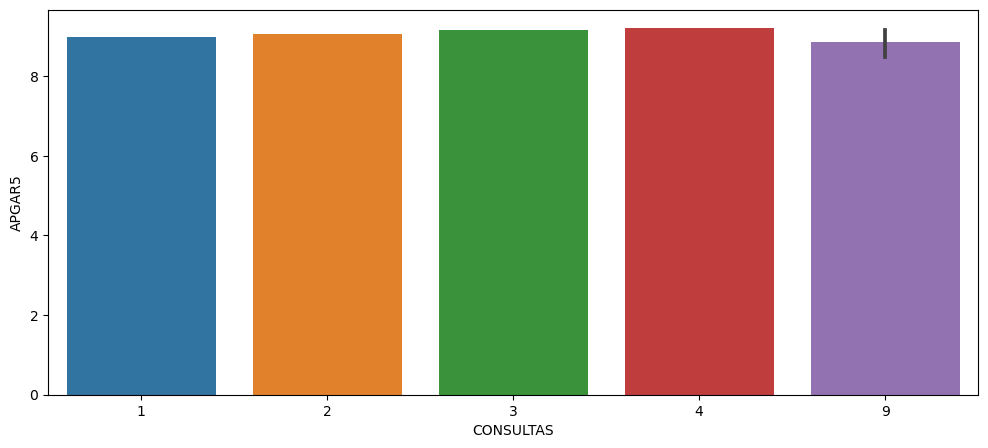

In [7]:
plt.figure(figsize=(12,5))
sns.barplot(x='CONSULTAS',
            y='APGAR5',
            data=base,
            estimator = np.mean
            )

<Axes: xlabel='APGAR5', ylabel='CONSULTAS'>

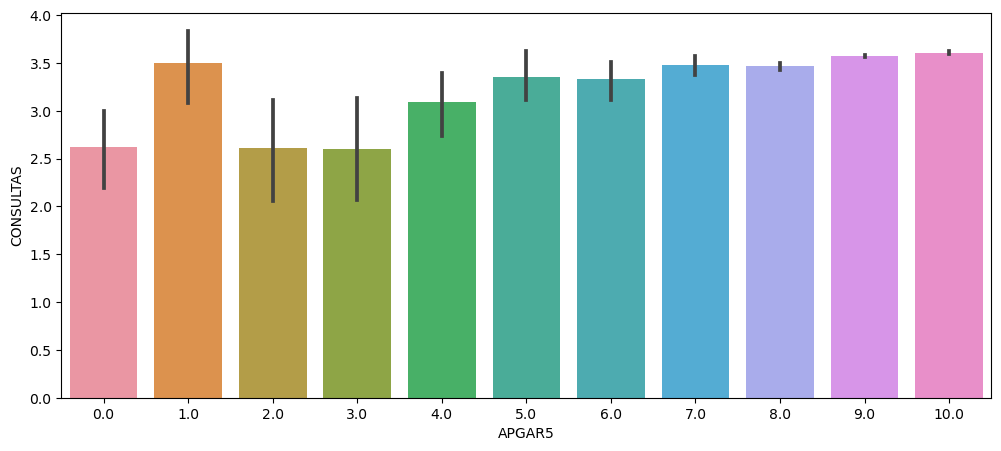

In [31]:
# Recado da aluna:
# Considerei útil avaliar a média do número de consultas por apgar. Achei explicativo.
# Com o gráfico acima é notável que o desvio padrão representativo no APGAR5 se encontra apenas na categoria dos 'não informados'.
# Por isso, para analisar a média de CONSULTAS por APGAR5, preferi eliminar as linhas onde 'CONSULTAS'='9', o invés de imputar.

plt.figure(figsize=(12,5))
sns.barplot(x='APGAR5',
            y='CONSULTAS',
            data=base.drop(base[base['CONSULTAS']==9].index),
            estimator = np.mean
            )

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

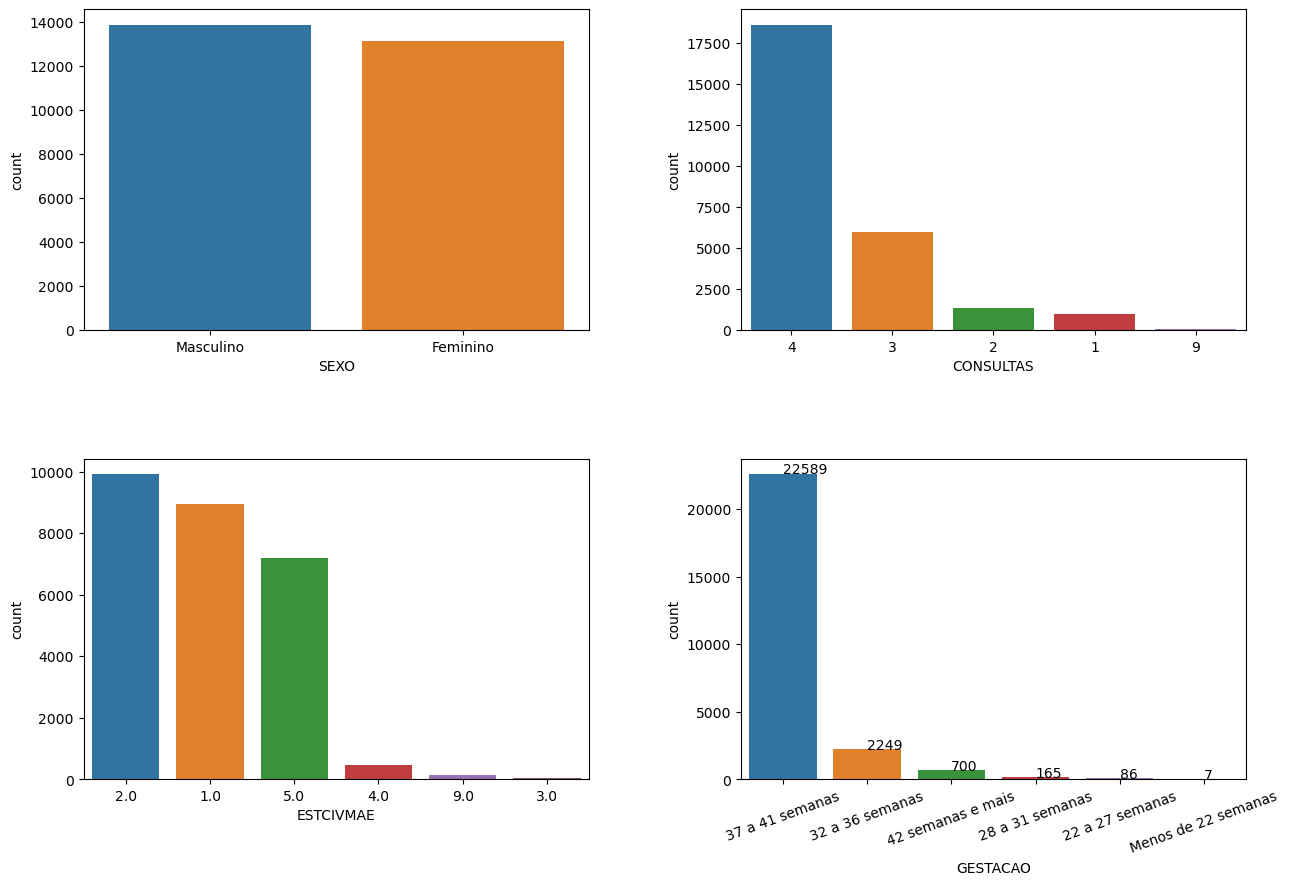

In [9]:
plt.rc('figure', figsize=(15, 10))
fig, axes = plt.subplots(2, 2)

sns.countplot(ax = axes[0,0], x='SEXO', data=base)
sns.countplot(ax = axes[0,1], x='CONSULTAS', data=base, order=base['CONSULTAS'].value_counts().index)
sns.countplot(ax = axes[1,1], x='GESTACAO', data=base, order=base['GESTACAO'].value_counts().index).tick_params(axis="x", rotation = 20)
sns.countplot(ax = axes[1,0], x='ESTCIVMAE', data=base, order=base['ESTCIVMAE'].value_counts().index)
valores_nas_barras(base['GESTACAO'].value_counts().index , base['GESTACAO'].value_counts())

plt.subplots_adjust(wspace=0.3, hspace=0.4)
